<a href="https://colab.research.google.com/github/marilynle/DS-Unit-2-Build/blob/master/Marilyn_Landim_Esko_Storytelling_Project_DS_Unit_2_Build_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microsoft (MSFT) stock price prediction

# Load data

Data colected from yahoo finance on 11/12/2019

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import adfuller


In [0]:
pip install --upgrade category_encoders


     |████████████████████████████████| 102kB 5.2MB/s 


In [0]:
!pip install --upgrade pandas-profiling plotly


     |████████████████████████████████| 133kB 9.1MB/s 
     |████████████████████████████████| 7.3MB 41.5MB/s 
     |████████████████████████████████| 614kB 44.1MB/s 
     |████████████████████████████████| 235kB 47.9MB/s 
     |████████████████████████████████| 307kB 50.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 215kB 58.6MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 737kB 47.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=7bdd96c0be90e746059bbb9e9aa488d2a494568f78dac7f100c3275b392b5df4
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=da5c46da89bad58bbd6f7fffcb4a612f1766ff2fd2cd3c008a3d3df54ce9d690
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 9.3MB/s 


In [0]:
url = "https://raw.githubusercontent.com/marilynle/DS-Unit-2-Build/master/stocks.csv"
df = pd.read_csv(url,header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
df.head()


open_msft  high_msft   low_msft  ...        tgt        wmt        fdx
datetime                                       ...                                 
0 2000-11-13   33.34375   34.06250  32.203125  ...  18.296497  31.713482  40.674557
1 2000-11-14   34.00000   34.90625  33.656250  ...  19.693838  32.807064  41.105827
2 2000-11-15   34.53125   35.43750  34.343750  ...  20.174177  34.294323  42.687160
3 2000-11-16   34.71875   35.75000  34.468750  ...  20.256430  33.769402  42.902782
4 2000-11-17   34.71875   35.00000  33.898438  ...  20.562681  33.988125  42.210953

[5 rows x 15 columns]

In [0]:
df.shape


(4778, 15)

In [0]:
df.dtypes


open_msft      float64
high_msft      float64
low_msft       float64
msft           float64
volume_msft      int64
aapl           float64
amzn           float64
orcl           float64
ibm            float64
jnj            float64
cvs            float64
ko             float64
tgt            float64
wmt            float64
fdx            float64
dtype: object

In [0]:
# Checking for null values
df.isnull().sum()


open_msft      0
high_msft      0
low_msft       0
msft           0
volume_msft    0
aapl           0
amzn           0
orcl           0
ibm            0
jnj            0
cvs            0
ko             0
tgt            0
wmt            0
fdx            0
dtype: int64

In [0]:
# summary stats
print(df.describe())


         open_msft    high_msft  ...          wmt          fdx
count  4778.000000  4778.000000  ...  4778.000000  4778.000000
mean     41.602737    42.002494  ...    52.857089   106.364977
std      27.160511    27.335819  ...    20.092679    54.144649
min      15.200000    15.620000  ...    30.879402    30.952911
25%      26.370001    26.660000  ...    37.713664    70.030728
50%      29.345000    29.650000  ...    42.861773    87.512119
75%      45.387501    45.695000  ...    65.721882   145.516300
max     145.339996   146.419998  ...   120.239998   268.354980

[8 rows x 15 columns]


In [0]:
import pandas_profiling
df.profile_report()


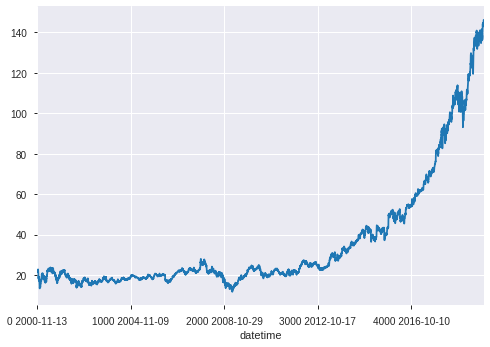

In [0]:
df.msft.plot.line();


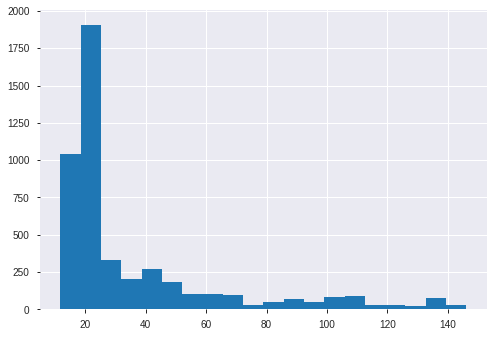

In [0]:
df.msft.hist(bins=20);


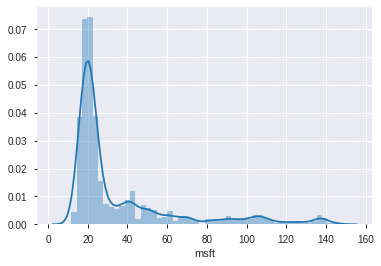

In [0]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['msft']);


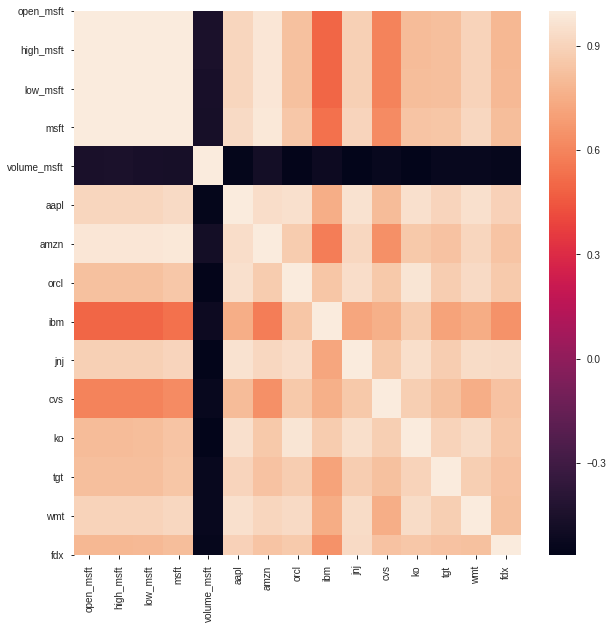

In [46]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr())

plt.show()


# Split the data


In [0]:
num_test = int(len(df)*0.3)
num_train = len(df) - num_test

train = df[:num_train]
test = df[num_train:]

train.shape, test.shape


((3345, 15), (1433, 15))

In [0]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()

    # Drop columns to avoid data leakage
    X = X.drop(columns=['open_msft','high_msft','low_msft'])  
    
    # Transform the time series to stationary
    cols = ['msft','aapl','amzn','orcl','ibm','jnj','cvs','ko','tgt','wmt','fdx','volume_msft']
    
    for col in cols:
        X[col]= np.log(X[col]) - np.log(X[col].shift(1))
    
    # NaN in the first row of log_return
    X.dropna(inplace=True)
    
    # Verify the time series to stationarity
    for col in cols:
        
        result = adfuller(X[col])
        print("") 
        print(col)
        print('p-value: %f' % result[1])
   
    # return the wrangled dataframe
    return X


train = wrangle(train)
test = wrangle(test)



msft
p-value: 0.000000

aapl
p-value: 0.000000

amzn
p-value: 0.000000

orcl
p-value: 0.000000

ibm
p-value: 0.000000

jnj
p-value: 0.000000

cvs
p-value: 0.000000

ko
p-value: 0.000000

tgt
p-value: 0.000000

wmt
p-value: 0.000000

fdx
p-value: 0.000000

volume_msft
p-value: 0.000000

msft
p-value: 0.000000

aapl
p-value: 0.000000

amzn
p-value: 0.000000

orcl
p-value: 0.000000

ibm
p-value: 0.000000

jnj
p-value: 0.000000

cvs
p-value: 0.000000

ko
p-value: 0.000000

tgt
p-value: 0.000000

wmt
p-value: 0.000000

fdx
p-value: 0.000000

volume_msft
p-value: 0.000000


All the series were transformed to log-return and they got p-value = 0 (they are stationary now).

```
# This is formatted as code
```



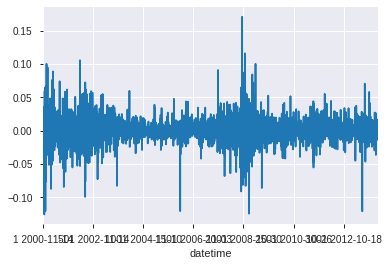

In [0]:
train.msft.plot.line();


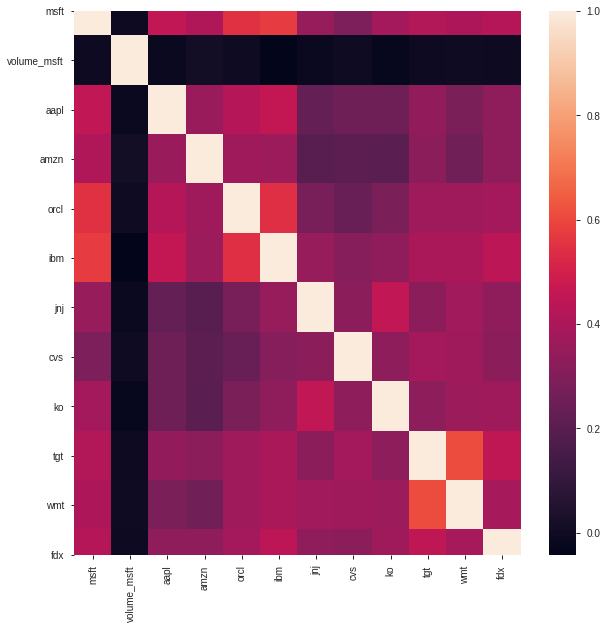

In [47]:
# correlations after the transformation of time series

plt.figure(figsize = (10, 10))
sns.heatmap(train.corr())

plt.show()


In [0]:
train.head()


msft  volume_msft      aapl  ...       tgt       wmt       fdx
datetime                                       ...                              
1 2000-11-14  0.035124     0.010190  0.044172  ...  0.073596  0.033902  0.010547
2 2000-11-15  0.018003    -0.332059 -0.018692  ...  0.024098  0.044336  0.037748
3 2000-11-16 -0.016187     0.421829 -0.045024  ...  0.004069 -0.015425  0.005038
4 2000-11-17  0.001812     0.145200 -0.026668  ...  0.015006  0.006456 -0.016257
5 2000-11-20 -0.027525    -0.284396  0.023374  ... -0.023682 -0.014258 -0.010269

[5 rows x 12 columns]

In [0]:
train.dtypes


msft           float64
volume_msft    float64
aapl           float64
amzn           float64
orcl           float64
ibm            float64
jnj            float64
cvs            float64
ko             float64
tgt            float64
wmt            float64
fdx            float64
dtype: object

In [0]:
# summary stats
print(train.describe())


              msft  volume_msft  ...          wmt          fdx
count  3344.000000  3344.000000  ...  3344.000000  3344.000000
mean      0.000135    -0.000419  ...     0.000213     0.000348
std       0.019441     0.334076  ...     0.014112     0.019609
min      -0.125739    -1.974746  ...    -0.084077    -0.156460
25%      -0.008703    -0.197376  ...    -0.007067    -0.009668
50%       0.000000    -0.007664  ...     0.000212     0.000093
75%       0.008981     0.188290  ...     0.007099     0.010514
max       0.170626     1.978840  ...     0.105018     0.109650

[8 rows x 12 columns]


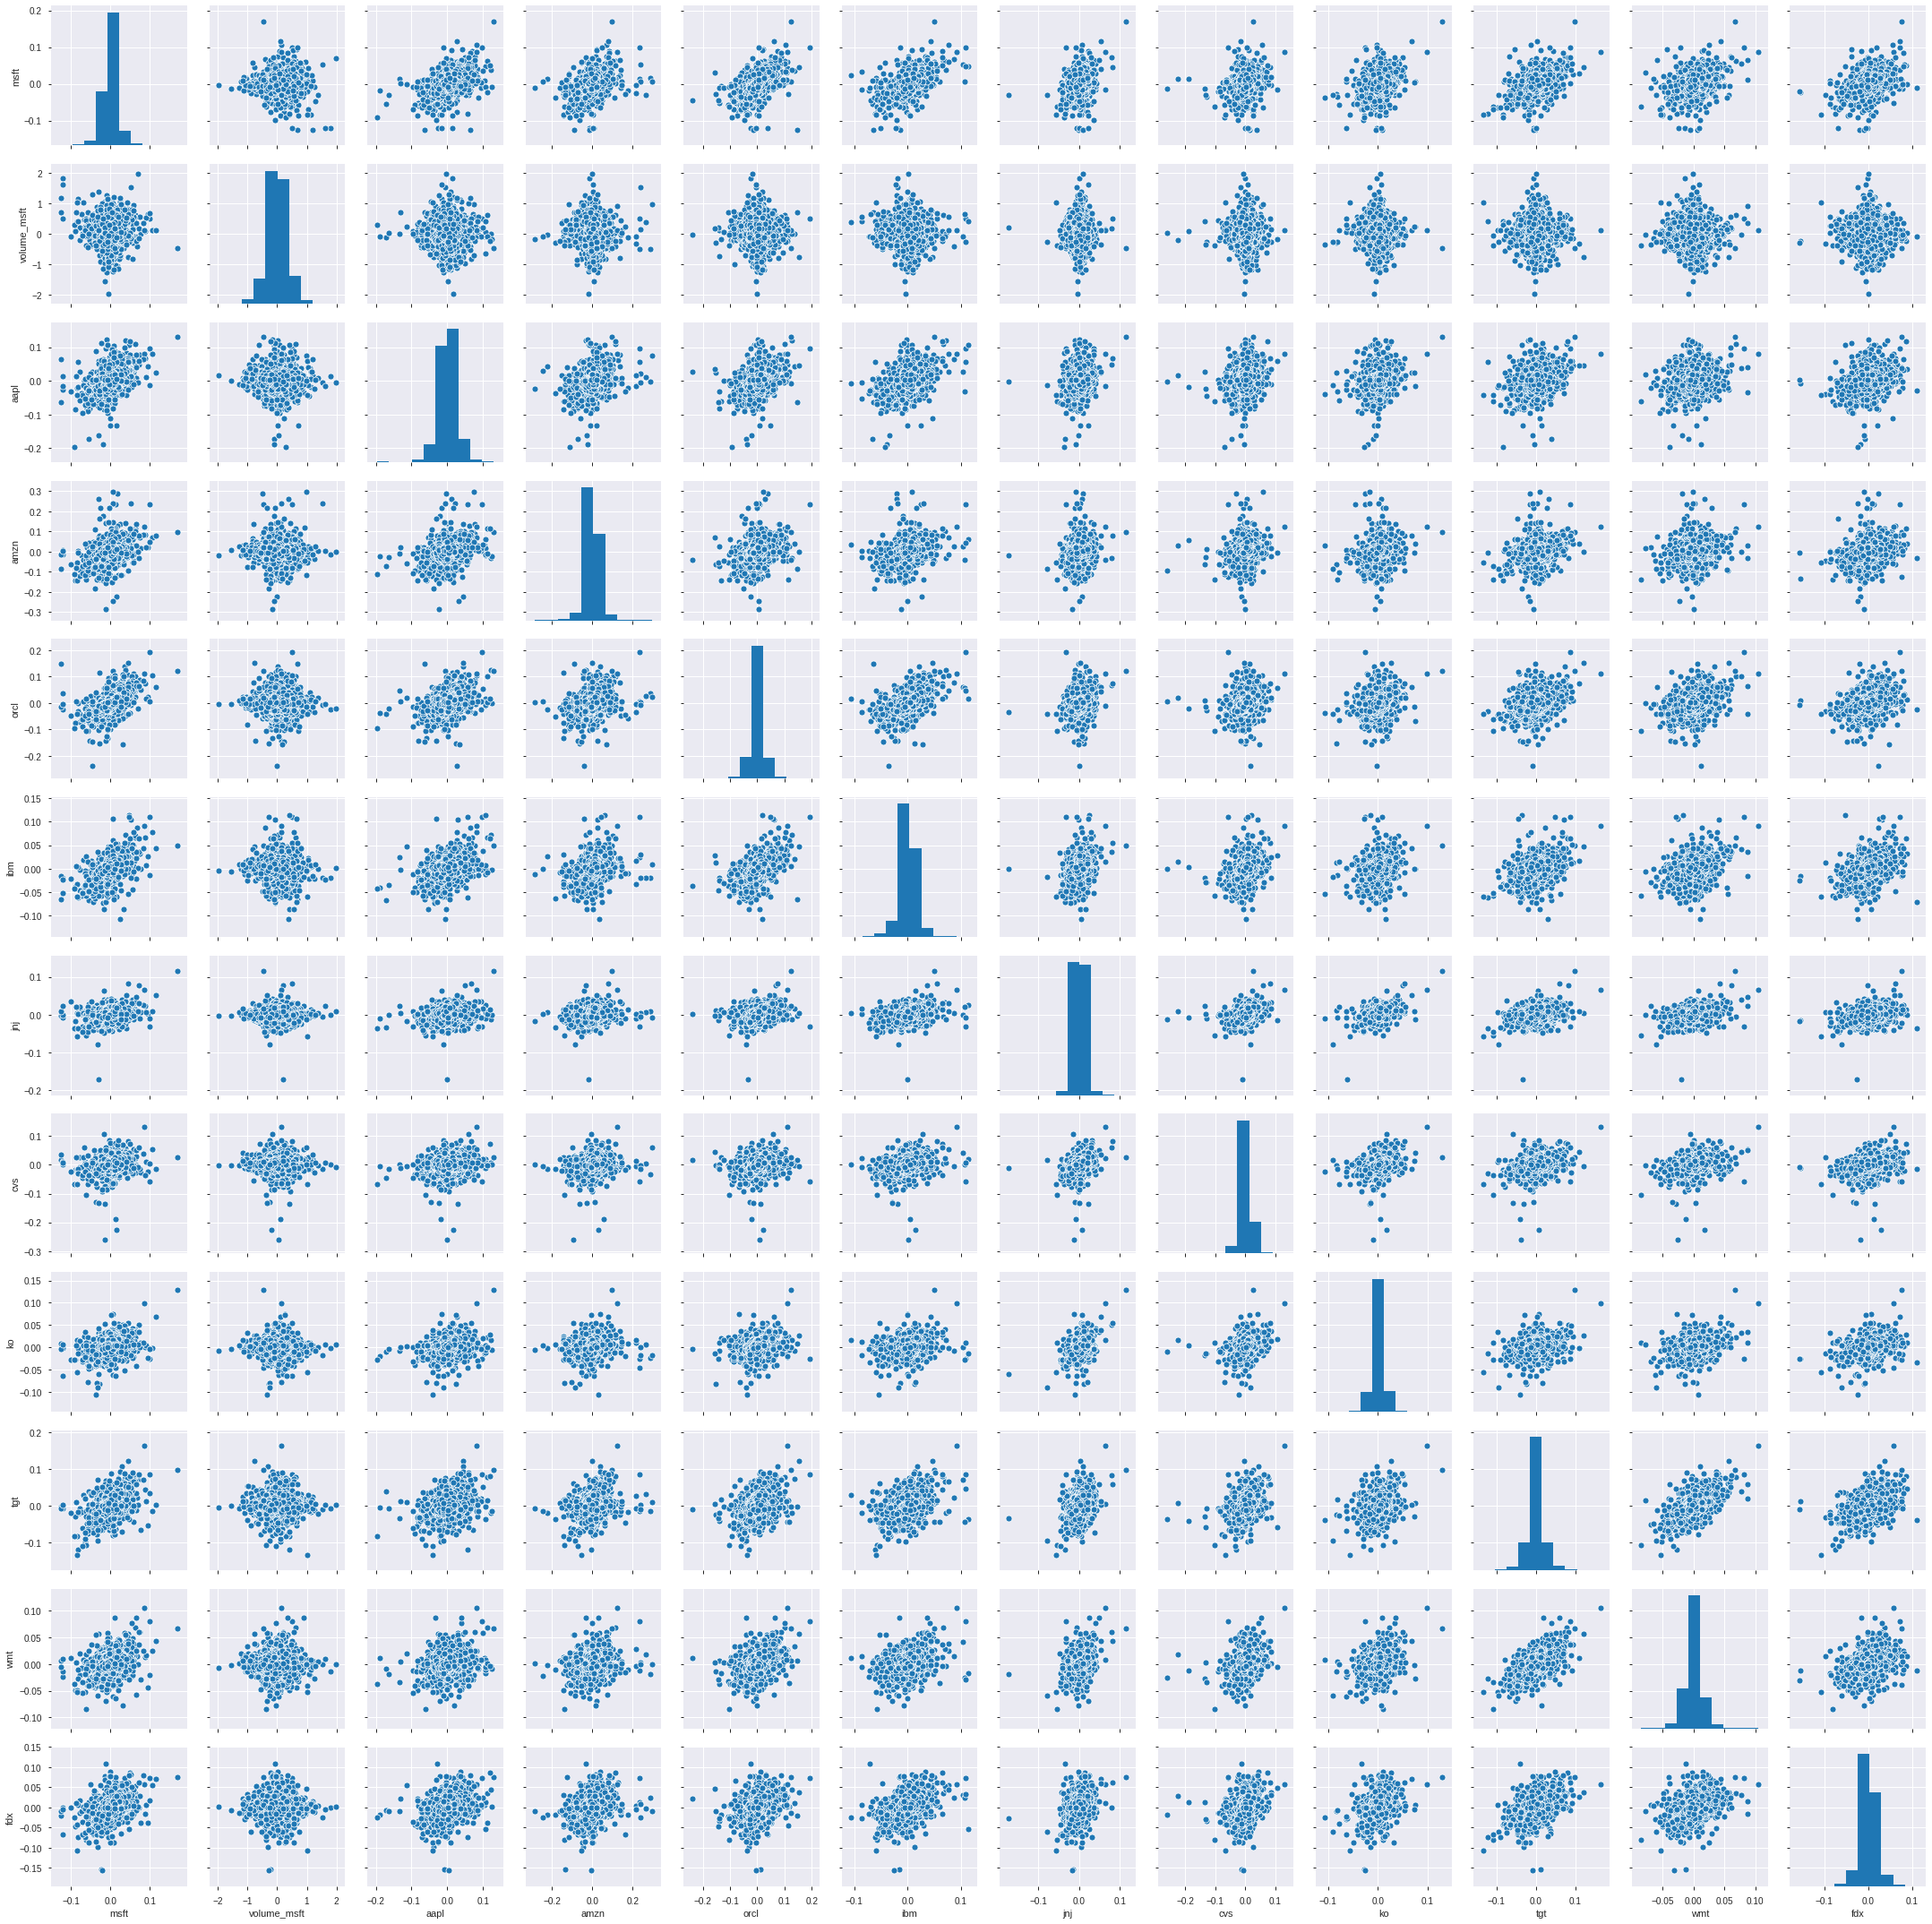

In [0]:
sns.pairplot(train)


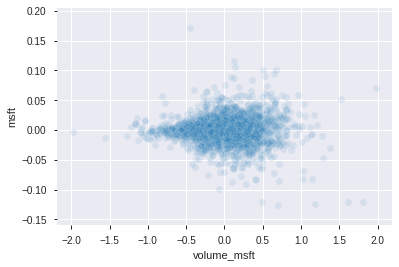

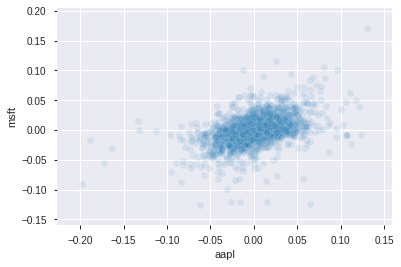

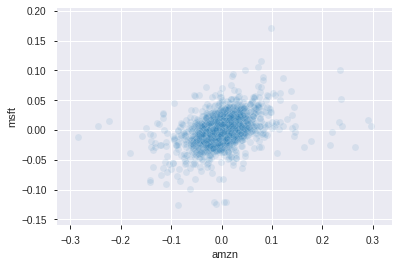

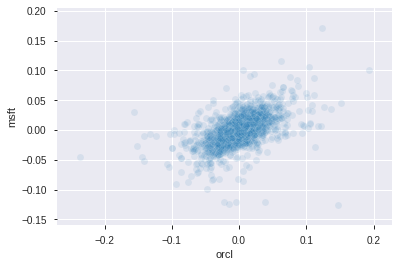

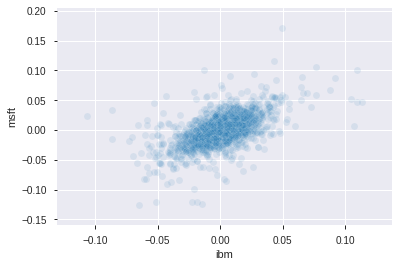

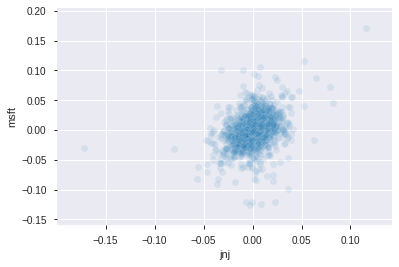

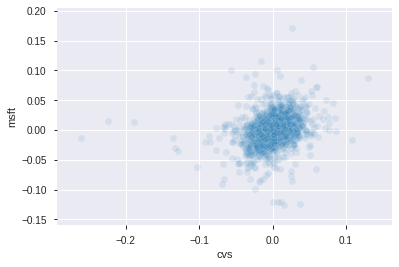

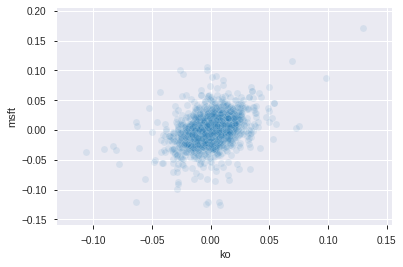

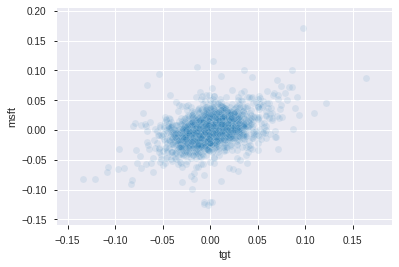

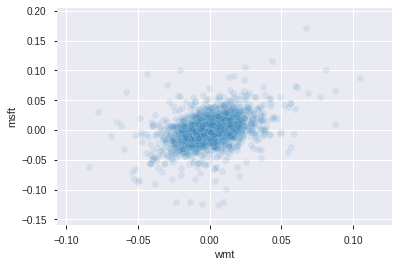

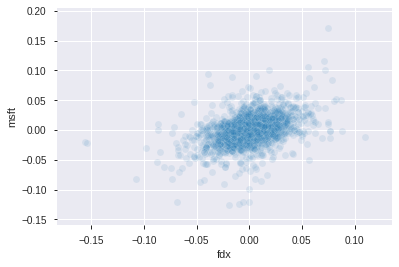

In [0]:
features = train.columns.drop(['msft'])
for feature in features:
    sns.scatterplot(x=feature, y='msft', data=train, alpha=0.1)
    plt.show()
    

In [0]:
train.profile_report()


# Baseline

In [0]:
# Mean baseline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train = train['msft']
y_test = test['msft']
y_pred_train = [y_train.mean()] * len(y_train)
y_pred_test  = [y_train.mean()] * len(y_test)

print('Mean Baseline:')
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Test Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Test Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Train R^2 Score:', r2_score(y_train, y_pred_train))
print('Test R^2 Score:', r2_score(y_test, y_pred_test))


Mean Baseline:
Train Root Mean Squared Error: 0.019437738310965163
Test Root Mean Square Error: 0.014406086209672585
Train Mean Absolute Error: 0.013101663289578548
Test Mean Absolute Error: 0.009923733653101183
Train R^2 Score: 0.0
Test R^2 Score: -0.0038265865449615966


In [0]:
target = 'msft'
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]


# Random forest regression model

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)


MAE for 3 folds: [0.01076111 0.00967739 0.00763663]


In [0]:
-scores.mean()


0.009358376078059496

In [0]:
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         

In [0]:
pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
mean_absolute_error(y_pred_test, y_test)


0.007229168032461349

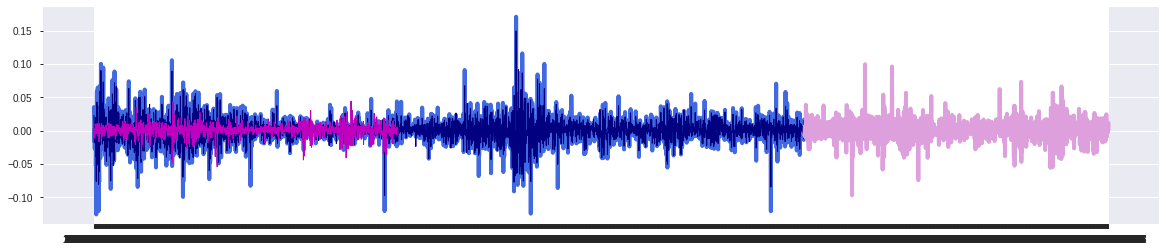

In [0]:
# Visualize predictions in log value
y_pred_train = pipeline.predict(X_train)

plt.figure(figsize=(20,4))
plt.plot(y_train, color='royalblue',linewidth=4)
plt.plot(y_pred_train, color='navy', linewidth=1)
plt.plot(y_test, color='plum', linewidth=4)
plt.plot(y_pred_test, color='m', linewidth=1);

# blue = train data, pink = test data
# light = real data, dark = predicted data


# Feature importance

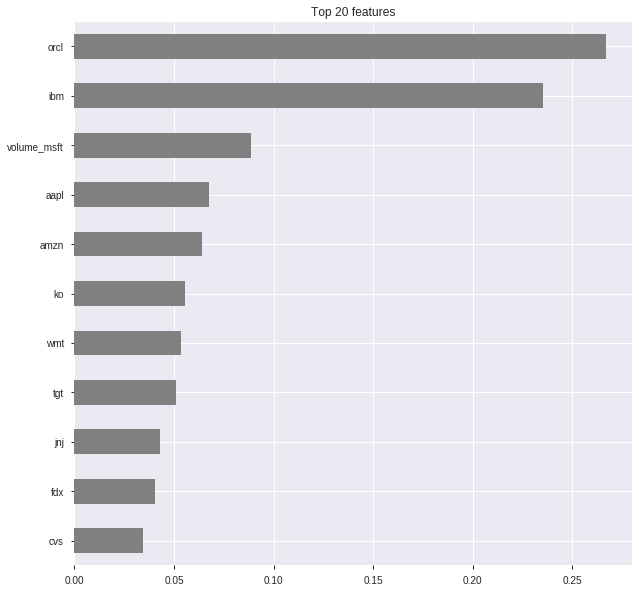

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');
